### Disclaimer

Code initially was created as answer to assigned in a course from the University of Oslo. Parts that are my own are indicated accordingly.

#  The Traveling Salesman Problem

## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

## Helper code for visualizing solutions

#### Code Is Not My Own

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

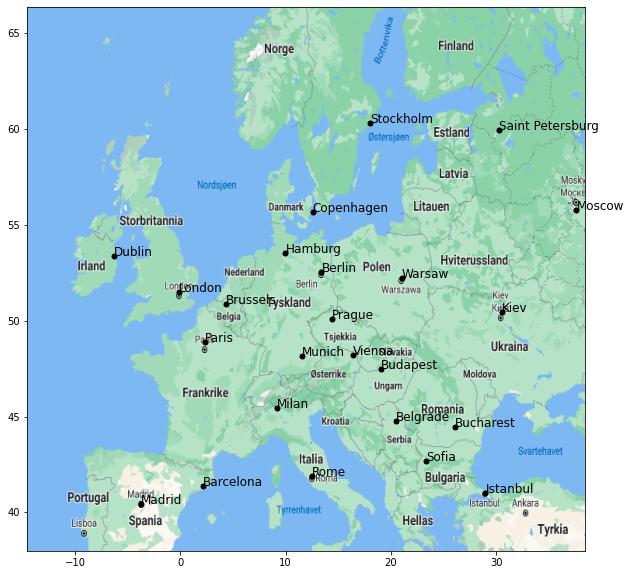

In [ ]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")


# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [ ]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


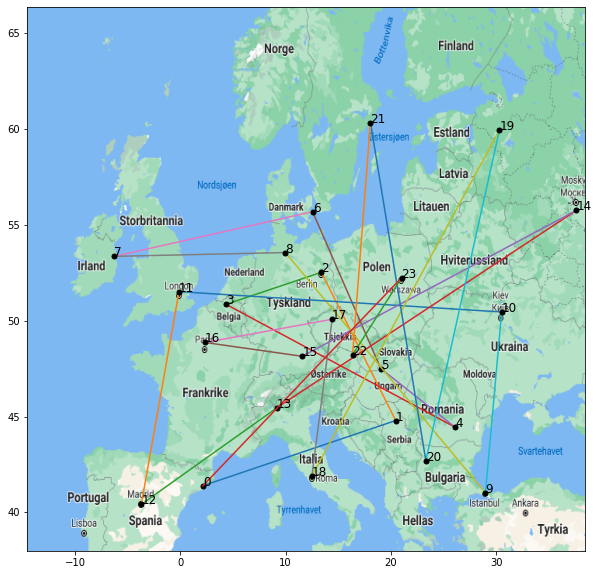

In [ ]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

# Solution

#### Code Is My Own

### comment by the author:
The code for the different task can be found below. For exhaustive search there are two algorithms, explanation about that will follow. Each task also has a comment by the author (with a similar label). The zip includes all needed data, including a pdf showing all the code (and results). The code of each task is extensively commented to explain what happens.

There are a number of additional packages used: pandas (for easy DataFrames), random (to create random numbers and samples), time (to stop needed runtime), math (for calculating n!), itemgetter (to perform a sorting of list by a sublist) and matplot to create plots. All of these are possibly already installed, but that's not guaranteed.

### custom imports & data prep below - please run first!

In [ ]:
#import additioal packages
import pandas as pd #pandas to create DataFrame (for easier usage)
import random as rnd #random to easily select randoms from lists
import time #timer to stop time needed for uns
import math #math pack for advanced calulcations
from operator import itemgetter
import matplotlib.pyplot as plt
from itertools import permutations

#loading city data (again), adding row names and selecting city list - partly this is doubling with actions already taken above
city_data = pd.read_table("european_cities.csv", delimiter=";", header=0)
cities = list(city_data[1:0])
city_data.index = cities

# function to calculcate total travel distance between cities
def calc_distance(calc_list):
    dist_sum = 0

    for calc_city in calc_list:

        if calc_list.index(calc_city)+1<len(calc_list):

            next_calc_city = calc_list[calc_list.index(calc_city)+1]
            dist_sum = dist_sum + city_data.at[calc_city, next_calc_city]

    return dist_sum

## Exhaustive Search

#### Code Is My Own

First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

Plotting result of run with 6 cities (top map).
distance: 3167.32, order of cities: ('Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Brussels', 'Barcelona')

Plotting result of run with 8 cities (bottom map).
distance: 4816.0, order of cities: ('Barcelona', 'Dublin', 'Brussels', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest')


,order of cities,distance,runtime in s,tested variants
cities,,,,
6,"(Bucharest, Belgrade, Budapest, Berlin, Brusse...",3167.32,0.0238,720
7,"(Bucharest, Belgrade, Budapest, Berlin, Copenh...",3636.40,0.1878,5040
8,"(Barcelona, Dublin, Brussels, Copenhagen, Berl...",4816.00,1.7584,40320


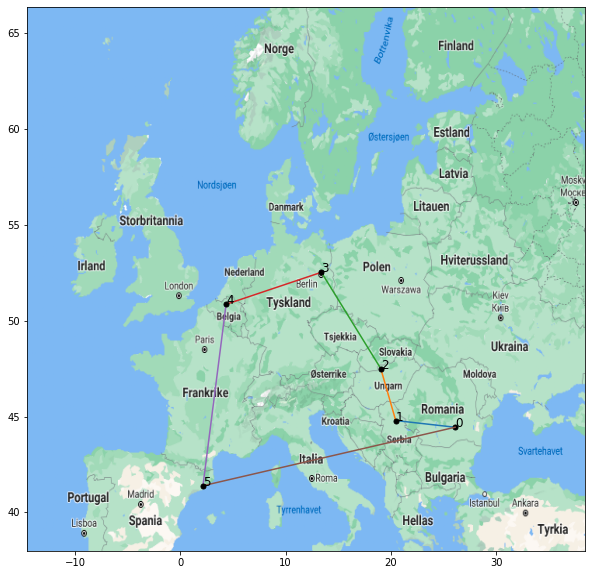

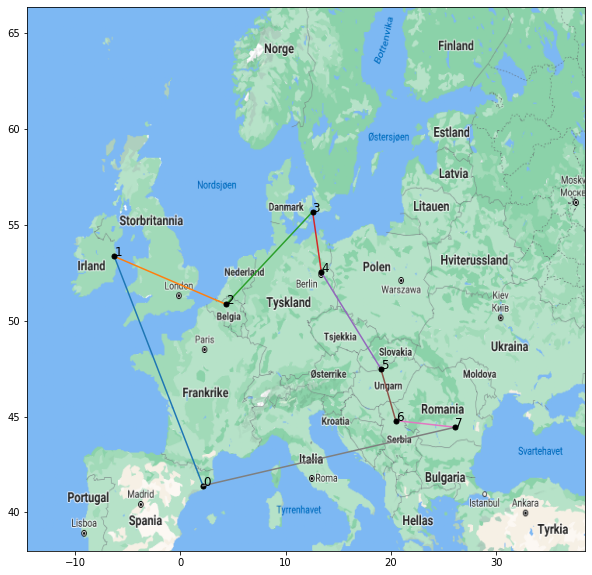

In [ ]:
# implement the algorithm here

# core exhaustive search algorithm
def tsp_exhaustive(city_nmb):

    # generating first ("best") order of cities and travel distance
    best_var_list = cities[0:city_nmb]
    best_var_dist = calc_distance(best_var_list)

    all_variations = permutations(best_var_list)
    counter = 0

    # creating & testing new variant for a total of n! times (the maximum number of possibilies)
    for test_var_list in all_variations:

        test_var_dist = calc_distance(test_var_list)

        # comparing distance of last best solution and comparision solution
        if test_var_dist < best_var_dist:

            #exchanging old best with new best
            best_var_list = test_var_list
            best_var_dist = test_var_dist

        # adding one to run counter
        counter = counter + 1

    # returning best result, distance and number of runs
    return [best_var_list, best_var_dist, counter]

# method to analyse different runs and compare them nicely
def run_tsp_exhaustive(init_low, init_high):
    low_calc = init_low

    # adding to name rows/collums
    all_results = [['cities', 'order of cities', 'distance', 'runtime in s', 'tested variants']]

    # running exhaustive search for all selected nmb. of cities (low, low+1, low+2, ..., high)
    while low_calc != init_high+1:

        # running exhaustive search and stopping needed time
        t = time.perf_counter()
        dist = tsp_exhaustive(low_calc)
        t = time.perf_counter()-t

        # adding results to result list, upping counter by one ("low")
        all_results.append([low_calc , dist[0], round(dist[1], 4) , round(t, 4), round(dist[2], 4)])
        low_calc = low_calc + 1

    # creating better readable dataframe/table
    output = pd.DataFrame(all_results[1:],columns=all_results[0]).set_index('cities')

    # plotting two maps, for highest and lowest city count
    print("Plotting result of run with "+str(init_low)+" cities (top map).\ndistance: "+str(output.at[init_low,'distance'])+
        ", order of cities: "+str(output.at[init_low,'order of cities'])+"\n")
    plot_plan(output.at[init_low,'order of cities'])

    print("Plotting result of run with "+str(init_high)+" cities (bottom map).\ndistance: "+str(output.at[init_high,'distance'])+
        ", order of cities: "+str(output.at[init_high,'order of cities']))
    plot_plan(output.at[init_high, 'order of cities'])

    display(output)

# running, printing exhaustive search for all number of cities from 6 to 10, plotting for 6 and 10 cities
run_tsp_exhaustive(6, 8)

### Comment by the author:

The script above runs for 5 times, stopping the time needed for each single run while adding one city each. So it's running with, 6,7,8,9 and 10 cities. The results are shown above, including the runtime. It's also showcasing the quickest routes for each amount and plotting the routes for 6 and 10 cities.

#### Comment about the algorithm

In theory the approach of just taking a random variation (as done above) and not checking if it already has been used does not guarantee the best outcome.

But due to extensive testing I have concluded that the highly improved performance with a larger number of cities and the lack of a big (if any) difference in the travel distance allows for a usage of the "fast" algorithm. I have nevertheless built a second algorithm, that checks if the generated travel variant has already been used and guarantees the best outcome in difference to the stochastic solution above.

**This complete algorithm variant can be found below!**
It is configured to output the same results (It's only much slower in doing so, especially with a higher number of cities).

# Hill Climbing

#### Code Is My Own

Result with 10 cities (top map and top table):
Analysis of 20 runs. Best variant: 6017.02, worst variant: 8477.44, mean variant: 7259.6775, standart deviation: 704.9948
Plotting best variant. Distance: 6017.02, number of changes: 10 runtime:0.0065, order of cities: ['Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin']

Result with 10 cities (bottom map and bottom table):
Analysis of 20 runs. Best variant: 16207.14, worst variant: 24055.81, mean variant: 18527.2605, standart deviation: 1963.4368
Plotting best variant. Distance: 16207.14, number of changes: 24 runtime:0.0264, order of cities: ['London', 'Dublin', 'Madrid', 'Barcelona', 'Milan', 'Brussels', 'Paris', 'Berlin', 'Moscow', 'Kiev', 'Bucharest', 'Sofia', 'Belgrade', 'Budapest', 'Vienna', 'Warsaw', 'Rome', 'Munich', 'Prague', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Istanbul']



,distance,nmb. of changes,runtime,order of cities
0,7859.92,6,0.0035,"[Barcelona, Belgrade, Istanbul, Bucharest, Ber..."
1,8477.44,8,0.0045,"[Belgrade, Budapest, Hamburg, Berlin, Buchares..."
2,6779.79,11,0.0056,"[Barcelona, Belgrade, Istanbul, Bucharest, Bud..."
3,7735.81,7,0.0056,"[Barcelona, Brussels, Budapest, Belgrade, Ista..."
4,7098.42,6,0.0030,"[Barcelona, Brussels, Budapest, Bucharest, Ist..."
5,6741.49,10,0.0041,"[Barcelona, Dublin, Brussels, Belgrade, Istanb..."
6,6793.76,8,0.0035,"[Belgrade, Budapest, Berlin, Copenhagen, Hambu..."
7,6226.15,12,0.0064,"[Istanbul, Bucharest, Belgrade, Budapest, Barc..."
8,7646.19,6,0.0033,"[Copenhagen, Hamburg, Berlin, Belgrade, Budape..."
9,6779.79,11,0.0053,"[Barcelona, Belgrade, Istanbul, Bucharest, Bud..."


,distance,nmb. of changes,runtime,order of cities
0,17427.38,23,0.0277,"[Milan, Vienna, Warsaw, Saint Petersburg, Kiev..."
1,18206.21,26,0.0372,"[Bucharest, Belgrade, Budapest, Rome, Sofia, I..."
2,21185.00,15,0.0151,"[Madrid, Berlin, Munich, Belgrade, Bucharest, ..."
3,16616.10,23,0.0196,"[Madrid, Barcelona, Rome, Sofia, Istanbul, Bud..."
4,16207.14,24,0.0264,"[London, Dublin, Madrid, Barcelona, Milan, Bru..."
5,17803.58,22,0.0257,"[Warsaw, Belgrade, Rome, Sofia, Bucharest, Ist..."
6,21874.52,15,0.0128,"[Stockholm, Budapest, Prague, Munich, Rome, Bu..."
7,24055.81,14,0.0118,"[Barcelona, Rome, Milan, Brussels, Berlin, Bel..."
8,19815.99,17,0.0169,"[Milan, Rome, Vienna, Brussels, London, Dublin..."
9,17258.20,29,0.0292,"[Rome, Madrid, Barcelona, Milan, Munich, Paris..."


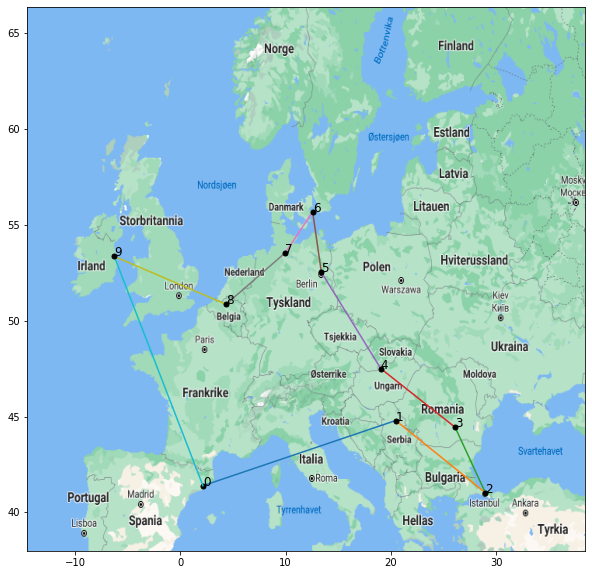

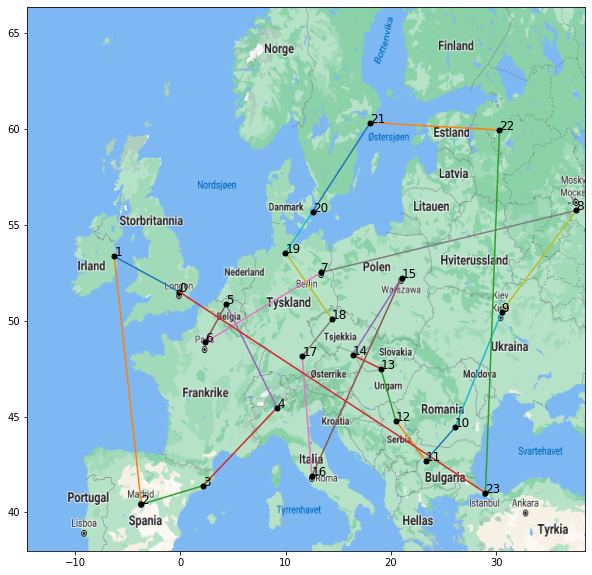

In [ ]:
# implement the algorithm here
def tsp_hillclimbing(city_nmb, max_changes):

    # preparting final results
    best_city_list = cities[0:city_nmb] # adding starting city to tour
    best_city_dist = calc_distance(best_city_list)

    # initalizing counter for total number of changes and number of trials without changes ("failed ones")
    change_counter = 0
    f_trial_counter = 0

    # looping until a certain number of changes have been made or the last 25 tries have not brought any change
    while change_counter < max_changes and f_trial_counter < 25:

        # creating alternative list of cities
        alt_city_list = list(best_city_list)

        # selecting which positions to change in the alternative to be tested
        switch_params = rnd.sample(alt_city_list, 2)
        param1_index = alt_city_list.index(switch_params[0])
        param2_index = alt_city_list.index(switch_params[1])

        # exchanging position of two cities in the list, upping failed trial counter by one (just in case)
        alt_city_list[param1_index], alt_city_list[param2_index] = alt_city_list[param2_index], alt_city_list[param1_index]
        f_trial_counter = f_trial_counter + 1

        # comparing old and new option
        if calc_distance(alt_city_list)<best_city_dist:

            # setting new best solution when better option was found
            best_city_list = list(alt_city_list)
            best_city_dist = calc_distance(best_city_list)

            # setting change counter, resetting failed trial counter since improvement was made
            change_counter = change_counter + 1
            f_trial_counter = 0

    # return final results
    return [round(best_city_dist, 4), change_counter, best_city_list]

# running hillclimp for selected amount of runs and cities
def run_tsp_hillclimb (city_amount, run_amount):

    # preparing results
    result = []

    # loop to run algorithm the selected amount of times
    for r in range(run_amount):

        # running exhaustive search with maximum 100 changes and stopping needed time
        t = time.perf_counter()
        tsp_result = tsp_hillclimbing(city_amount, 100)
        t = time.perf_counter()-t

        #adding result of the run to the list of all runs
        result.append([tsp_result[0], tsp_result[1], round(t, 4), tsp_result[2]])

    # returning overview of all runs made and time needed
    return result

# calculating best, worst and mean run as well as standart derivation. Print & plotting the best run.
def result_analysis (result_list):

    # preparing result list to calculate with
    dist_list = []

    # looping trough all results and selecting total distances for each run
    for entry in result_list :
        dist_list.append(entry[0])

    # calculating min, max, mean and standart devivation with the help of numphy
    dist_list = np.array(dist_list)
    dist_best = round(dist_list.min(), 4)
    dist_worst = round(dist_list.max(), 4)
    dist_mean = round(dist_list.mean(), 4)
    dist_std = round(dist_list.std(), 4)

    # looping trough list of all runs to find data from the best variant
    for entry in result_list :
        if entry[0] == dist_best:
            best_run = entry

    # printing results of analysis
    print("Analysis of 20 runs. Best variant: "+str(dist_best)+", worst variant: "+ str(dist_worst)+", mean variant: "+str(dist_mean)+", standart deviation: "+str(dist_std))

    # plotting best variant
    print("Plotting best variant. Distance: "+str(best_run[0])+", number of changes: "+str(best_run[1])+" runtime:"+ str(best_run[2]) +", order of cities: "+str(best_run[3])+"\n")
    plot_plan(best_run[3])

    # creating table of all runs
    display(pd.DataFrame(result_list, columns=['distance', 'nmb. of changes', 'runtime', 'order of cities']))


print("Result with 10 cities (top map and top table):")
result_analysis(run_tsp_hillclimb(10, 20))

print("Result with 10 cities (bottom map and bottom table):")
result_analysis(run_tsp_hillclimb(24, 20))

## Genetic Algorithm

#### Code Is My Own


Running and analyzing EA with population size of 20 . Plotting best version as map. It's map number 1
Plotting best variant. Distance: 16326.93, order of cities: ['Paris', 'Madrid', 'Barcelona', 'Milan', 'Munich', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Berlin', 'Belgrade', 'Rome', 'Vienna', 'Budapest', 'Istanbul', 'Bucharest', 'Sofia', 'Warsaw', 'Copenhagen', 'Brussels', 'Prague', 'Hamburg', 'London', 'Dublin']

Analysis of 20 runs with population of 20.
 Best variant: 16326.93, worst variant: 21074.89, mean variant: 18718.6555, standart deviation: 1093.6604


Running and analyzing EA with population size of 30 . Plotting best version as map. It's map number 2
Plotting best variant. Distance: 15681.38, order of cities: ['Dublin', 'London', 'Brussels', 'Hamburg', 'Berlin', 'Copenhagen', 'Warsaw', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Istanbul', 'Sofia', 'Bucharest', 'Milan', 'Munich', 'Vienna', 'Budapest', 'Prague', 'Paris', 'Madrid', 'Barcelona', 'Rome', 'Belgrade',

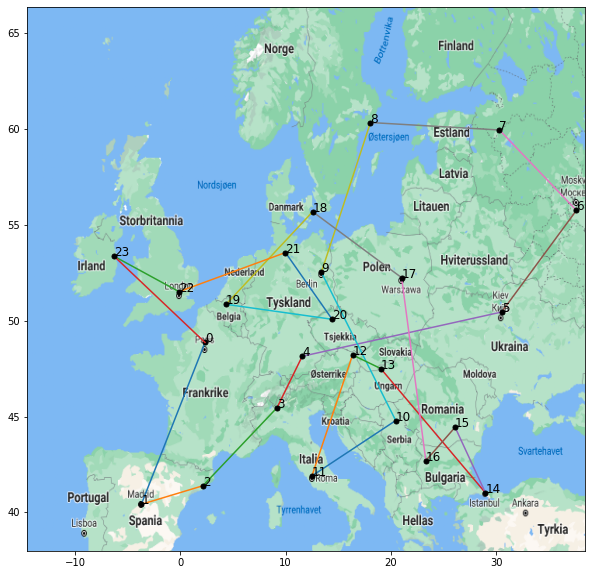

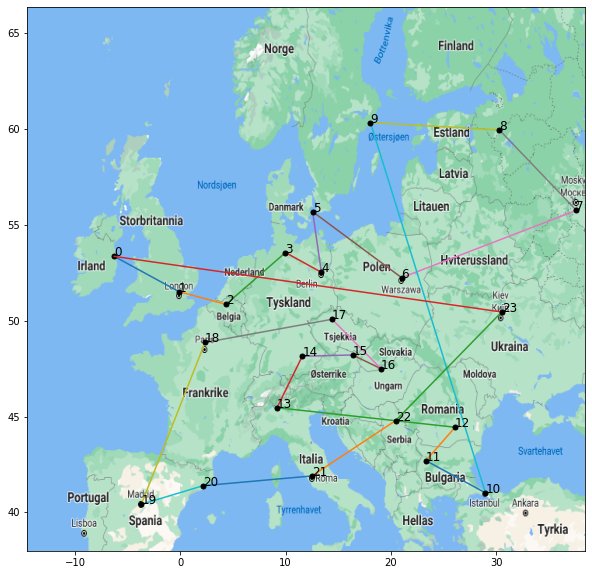

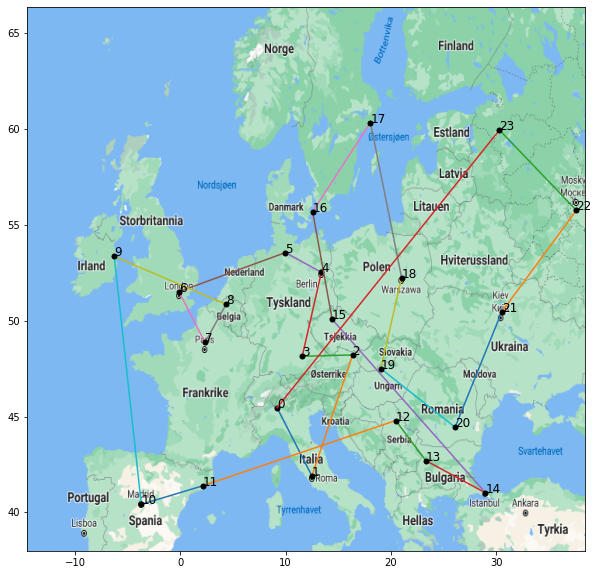

In [ ]:
# Implement the algorithm here

# core EA algorithm for TSP problem
def tsp_genetic(gen_city_nmb, population_size, generation_max):

    # initalizing generation counter and list of all the best genotypes in each generation
    generation = 1
    generation_overview = []

    # creating inital population
    population = populate_genetic(gen_city_nmb, population_size)

    # finding & saving best genotype for first generation
    population = sorted(population, key=itemgetter(0))
    generation_overview.append(list([generation, population[0][0], population[0][1]]))

    # running until maximum generations have been reached
    while generation < generation_max:

        # selecting best, medium and worst genotype
        best_genotype = population[0]
        medium_genotype = population[round(population_size * 0, 5)]
        worst_genotype = population[population_size-1]

        # mutating genotype selection of the genotypes, recreating population
        population = repopulate_genetic(best_genotype, medium_genotype, worst_genotype, population_size)

        # sorting all by their fitness (lower distance = higher fitness)
        population = sorted(population, key=itemgetter(0))

        # adding best genotype to the generation overview, upping generation counter by 1
        generation = generation + 1
        generation_overview.append(list([generation, round(population[0][0],2), population[0][1]]))

    # returning overview of all the best genotypes in each generation
    return generation_overview

# function to create inital population for EA
def populate_genetic(gen_city_nmb, population_size):

    # iniliazing population counter
    init_pop_counter = 0
    init_population = []

    # randomly creating inital population, looping until population size has been reached
    while init_pop_counter < population_size:

        # creating new radnom city order and calculating distance
        init_pop = rnd.sample(cities[0:gen_city_nmb], gen_city_nmb)
        ini_pop_dist = calc_distance(init_pop)

        # adding new variant to total population, upping population counter by 1
        init_population.append([ini_pop_dist, init_pop])
        init_pop_counter = init_pop_counter + 1

    # return inital population
    return init_population


# function to create new, mutated population selection
def repopulate_genetic(best_genotype, medium_genotype, worst_genotype, population_size):

    # creating total population counter, initalizing list with 3 unmutated genotypes to keep (best, medium, worst)
    population_counter = 3
    recreated_population = [best_genotype, medium_genotype, worst_genotype]

    # creating new population with ~ xx% of a mutated best genotype, looping until size reached
    while population_counter < population_size*0.3:

        # mutating genotype of the best solution
        mutate_best_genotype = src_mutate_genetic(best_genotype[1])
        m_best_genotype_dist = calc_distance(mutate_best_genotype)

        # adding copy of best genotype to population, , upping population size counter by one
        recreated_population.append([m_best_genotype_dist, mutate_best_genotype,])
        population_counter = population_counter + 1

    # adding ~ xx% of a mutated medium genotype to the population, looping until size reached
    while population_counter < population_size*0.8:

        # mutating genotype of the best solution
        mutate_medium_genotype = src_mutate_genetic(medium_genotype[1])
        m_medium_genotype_dist = calc_distance(mutate_medium_genotype)

        # adding newly created genotype to population, upping population size counter by one
        recreated_population.append([m_medium_genotype_dist, mutate_medium_genotype])
        population_counter = population_counter + 1

    # filling up rest of the population with the mutation of the worst genotype, looping until size reached
    while population_counter < population_size:

        # mutating genotype of the worst solution
        mutate_worst_genotype = src_mutate_genetic(worst_genotype[1])
        m_worst_genotype_dist = calc_distance(mutate_worst_genotype)

        # adding newly created genotype to population, , upping population size counter by one
        recreated_population.append([m_worst_genotype_dist, mutate_worst_genotype])
        population_counter = population_counter + 1

    # returning recreated_population
    return recreated_population


#triple swap mutation of genotype for higher diversity in the population
def src_mutate_genetic(genotype):

    # creating genotype sublist for a new genotype
    mutate_genotype = list(genotype)

    # randomly creating 6 "genes" that should be switched
    scramble_points = rnd.sample(range(len(genotype)), 6)
    scramble_points.sort()

    # initalizing change counter to get position of replacements
    change_counter = 0
    insert_counter = 5

    # looping trough all genes and checking if it one to be mutated/swaped
    for gene in genotype:

        # checking if current gene is one to be mutated
        if mutate_genotype.index(gene) == scramble_points[change_counter] and change_counter<2:

            # swapping genes, i.e. 2th with 6th gene, based on random points
            mutate_genotype[genotype.index(gene)] = genotype[scramble_points[insert_counter]]
            mutate_genotype[scramble_points[insert_counter]] = genotype[genotype.index(gene)]

            # upping/lowering counters to select correct genes to be switching
            change_counter = change_counter+1
            insert_counter = insert_counter-1

    # return mutated genotype
    return mutate_genotype

# running GA, creating special data for analysis and plotting best run
def run_tsp_genetic(gen_city_nmb, run_nmb, population_size, max_generations):

    # initalizing data to be returned
    distance_results = pd.DataFrame()

    run_results_best = []

    # running EA for total number of runs
    for run in range(run_nmb):

        # initalizing list to hold results
        run_distances =  []
        run_result = []

        # running GA, appending best results to best_runs overview
        run_result = tsp_genetic(gen_city_nmb,population_size, max_generations)

        # saving list of all the best genotypes for plotting
        for result in run_result:
            run_distances.append(result[1])

            if (result[0]==30):
                run_results_best.append(result)

        # adding list of best genotypes per run to list of all genotypes
        distance_results[str(run)] = run_distances

    run_results_best = sorted(run_results_best, key=itemgetter(1))
    best_overall = run_results_best[0]

    # plotting best variant
    print("Plotting best variant. Distance: "+str(best_overall[1])+ ", order of cities: "+str(best_overall[2])+"\n")
    plot_plan(best_overall[2])

    return distance_results

# running EA and analysis data
def tsp_genetic_analysis(population_sizes, city_nmb, run_nmb, max_generations):

    # initalizing list for avg fintess over generations
    population_avg_fitness = []
    run_counter = 1

    # running EA for different population sizes
    for population_size in population_sizes:

        # running EA
        print("\nRunning and analyzing EA with population size of "+str(population_size)+" . Plotting best version as map. It's map number "+str(run_counter))
        population_size_rs = run_tsp_genetic(city_nmb, run_nmb, population_size, max_generations)
        run_counter = run_counter + 1

        # initalizing list for avg fintess of each generation, creating generation counter
        population_size_avg_gen = []
        generation_counter = 0

        # looping over each generation
        while generation_counter < max_generations:

            # getting best fintess of each generation, upping counter by one
            population_size_avg_gen.append(round(population_size_rs.values.tolist()[generation_counter][0],2))
            generation_counter = generation_counter+1

        # saving avg fintess over generations for plotting
        population_avg_fitness.append([population_size, population_size_avg_gen])

        # calculating stats for best results of each population size
        population_final_list =  np.array(population_size_rs.values.tolist()[generation_counter-1])
        population_final_best = round(population_final_list.min(), 4)
        population_final_worst = round(population_final_list.max(), 4)
        population_final_mean = round(population_final_list.mean(), 4)
        population_final_std = round(population_final_list.std(), 4)

        print("Analysis of 20 runs with population of "+str(population_size)+".\n Best variant: "+str(population_final_best)+", worst variant: "+ str(population_final_worst)+", mean variant: "+str(population_final_mean)+", standart deviation: "+str(population_final_std)+"\n")

    return population_avg_fitness

population_avg_fitness = tsp_genetic_analysis([20, 30, 50], 24, 20, 30)

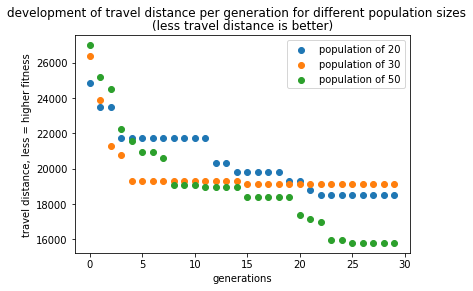

In [ ]:
# extra function for plotting avg fintess because jupyter notebook was bugging (copied from abot)

# running GA, creating special data for analysis and plotting best run
def run_tsp_genetic_plotting(gen_city_nmb, run_nmb, population_size, max_generations):

    # initalizing data to be returned
    distance_results = pd.DataFrame()

    run_results_best = []

    # running EA for total number of runs
    for run in range(run_nmb):

        # initalizing list to hold results
        run_distances =  []
        run_result = []

        # running GA, appending best results to best_runs overview
        run_result = tsp_genetic(gen_city_nmb,population_size, max_generations)

        # saving list of all the best genotypes for plotting
        for result in run_result:
            run_distances.append(result[1])

            if (result[0]==30):
                run_results_best.append(result)

        # adding list of best genotypes per run to list of all genotypes
        distance_results[str(run)] = run_distances

    run_results_best = sorted(run_results_best, key=itemgetter(1))
    best_overall = run_results_best[0]

    return distance_results

# running EA and analysis data
def tsp_genetic_plotting(population_sizes, city_nmb, run_nmb, max_generations):

    # initalizing list for avg fintess over generations
    population_avg_fitness = []
    run_counter = 1

    # running EA for different population sizes
    for population_size in population_sizes:

        # running EA
        population_size_rs = run_tsp_genetic_plotting(city_nmb, run_nmb, population_size, max_generations)
        run_counter = run_counter + 1

        # initalizing list for avg fintess of each generation, creating generation counter
        population_size_avg_gen = []
        generation_counter = 0

        # looping over each generation
        while generation_counter < max_generations:

            # getting best fintess of each generation, upping counter by one
            population_size_avg_gen.append(round(population_size_rs.values.tolist()[generation_counter][0],2))
            generation_counter = generation_counter+1

        # saving avg fintess over generations for plotting
        population_avg_fitness.append([population_size, population_size_avg_gen])


    # plotting average development of fitness for each generation
    x = range(max_generations)

    # adding points for different population sizes
    plt.scatter(x, population_avg_fitness[0][1], label = "population of " + str(population_avg_fitness[0][0]))
    plt.scatter(x, population_avg_fitness[1][1], label = "population of " + str(population_avg_fitness[1][0]))
    plt.scatter(x, population_avg_fitness[2][1], label = "population of " + str(population_avg_fitness[2][0]))

    # addding title, subtitle
    plt.title("(less travel distance is better)")
    plt.suptitle("development of travel distance per generation for different population sizes")

    # adding legend, x and y-label tags
    plt.legend()
    plt.xlabel("generations")
    plt.ylabel("travel distance, less = higher fitness")
    plt.show()

# triggering plotting with 20, 30, 50 population size
tsp_genetic_plotting([20, 30, 50], 24, 20, 30)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close?

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search?

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer

# running GA, creating special data for analysis and plotting best run
def run_tsp_genetic_twice(gen_city_nmbs, population_size, max_generations):

    all_results = []
    run_times = []

    for nmb in gen_city_nmbs:

        # running GA with selected amount of cities, stopping the time to get runtime
        t = time.perf_counter()
        result = tsp_genetic(nmb,population_size, max_generations)
        t = time.perf_counter()-t

        # appending run times to later create new collum, saving final results of the EA run
        run_times.append(round(t,4))
        all_results.append(result[max_generations-1])

    # creating dataframe for nicer visual, adding runtime collum
    all_results = pd.DataFrame(all_results, columns=['generation', 'distance', 'order of cities'], index=['10 cities', '24 cities'])
    all_results['runtime'] = run_times

    # returning dataframe
    return all_results

display(run_tsp_genetic_twice([10,24], 50, 30 ))

,generation,distance,order of cities,runtime
10 cities,30,6758.73,"[Dublin, Brussels, Berlin, Copenhagen, Hamburg...",0.1050
24 cities,30,18887.74,"[Madrid, Paris, Vienna, Saint Petersburg, Mosc...",0.2456
